In [1]:
import codecs
import labMTsimple.storyLab
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
f = codecs.open("../data/clean_bot_tweets.txt", "r")
bots = f.read()
f.close()

In [3]:
f = codecs.open("../data/clean_human_tweets.txt", "r")
humans = f.read()
f.close()

## Sentiment of tweets

In [4]:
lang = "spanish"
widths = np.linspace(0, 3, num = 100)
bots_scores = []
humans_scores = []
for width in widths:
    labMT,labMTvector,labMTwordList = labMTsimple.storyLab.emotionFileReader(stopval=width,lang=lang,returnVector=True)
    
    bot_sent, _ = labMTsimple.storyLab.emotion(bots,labMT,shift=True,happsList=labMTvector)
    bots_scores.append(bot_sent)
    human_sent,_ = labMTsimple.storyLab.emotion(humans,labMT,shift=True,happsList=labMTvector)
    humans_scores.append(human_sent)

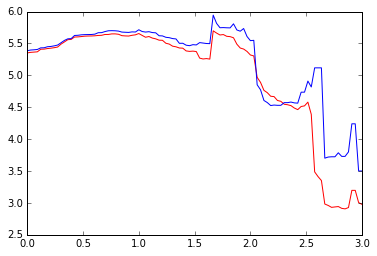

In [5]:
plt.plot(widths, humans_scores, 'r', widths, bots_scores, 'b')

## Sentiment of tweets with retweets removed

In [6]:
def get_tweets_without_rt(input_path):
    docs = []
    f = open(input_path, 'rU')
    for line in f:
        tweet = line.rstrip()
        if tweet[:2] != "RT":
            docs.append(tweet)       
    f.close()    
    return docs
bot_tweets = get_tweets_without_rt("../data/clean_bot_tweets.txt")
human_tweets = get_tweets_without_rt("../data/clean_human_tweets.txt")

In [7]:
bots_scores = []
humans_scores = []
for width in widths:
    labMT,labMTvector,labMTwordList = labMTsimple.storyLab.emotionFileReader(stopval=width,lang=lang,returnVector=True)
    

    bot_sent, _ = labMTsimple.storyLab.emotion(" ".join(bot_tweets),labMT,shift=True,happsList=labMTvector)
    bots_scores.append(bot_sent)
    human_sent, _= labMTsimple.storyLab.emotion(" ".join(human_tweets),labMT,shift=True,happsList=labMTvector)
    humans_scores.append(human_sent)

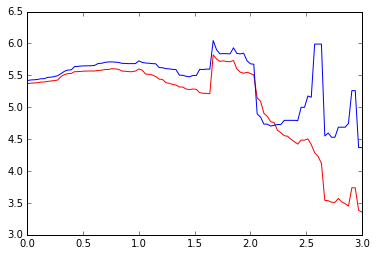

In [8]:
plt.plot(widths, humans_scores, 'r', widths, bots_scores, 'b')